In [1]:
import cprv1 as cpr
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import netCDF4

# self= cpr.RedRio(codigo=181,SimuBasin=True,**keys) #se importa el módulo
# filepath = 'redrio/20180509/Aforo_La_Grande.xlsx'
# self.read_excel_format(filepath)
# self.procesa_aforo()
# self.plot_seccion()
# self.plot_lluvia()
# self.plot_compara_historicos()
# self.to_excel()

# Definir estación de aforo
Los codigos corresponden al index de cada estación en la tabla info_redrio. Para consultarlos se recomienda crear una instancia de la clase RedRio con un codigo arbitrario para poder consultar dicha tabla, uno de sus argumentos es cpr.info.REMOTE, que corresponde a un diccionario que continene la infromación necesaria para realizar la conexión a la base de datos. De esta tabla se toma el codigo correspondiente a la estación de interes y se sobreescribe el objeto estacion. 

In [2]:
cpr.info.REMOTE

{'dbname': 'siata',
 'host': '192.168.1.74',
 'passwd': 'si@t@64512_C0nsult4',
 'port': 3306,
 'table': 'estaciones',
 'user': 'siata_Consulta'}

In [3]:
estacion=cpr.RedRio(codigo=181,SimuBasin=False,**cpr.info.REMOTE)

In [4]:
estacion.info_redrio[30:40] #Cambiar los valores del slice para ver el resto de la tabla.

,Nombre,FolderName,Municipio,Direccion,Barrio,Subcuenca,Longitud,Latitud,morfo
1062,Niquía (E21),Niquia,Bello,No,No,Río Aburrá,-75.524200,6.340000,1.0
1027,Q. La Bermejala (Q34),Q_La_Bermejala,Medellín,Calle 85 Cra 58A,Moravia,La Bermejala,-75.566600,6.279090,1.0
1014,Q. La Mina (Q25),Q_La_Mina,Envigado,Calle 39sur Cra 49,Estación Metro Envigado,-999,-75.596489,6.169088,1.0
1007,Q. La Picacha (Q20),Q_La_Picacha,Medellín,Calle 42c Cra 64b,Conquistadores,La Picacha,-75.581071,6.245597,1.0
1023,Q. La Doctora (Q3),Q_La_Doctora,Sabaneta,Cra 48 con calle 73 Sur,Sementerio De Sabaneta,Quebrada La Doctora,-75.620500,6.153300,1.0
1009,Q. La Valeria (Q1),Q_La_Valeria,Caldas,Calle 125sur Cra 49,La Valeria,La Valeria,-75.636383,6.095301,1.0
181,Q. La Grande (Q5),Q_La_Grande,La Estrella,Calle 83cSur Cra 50,Ruta los Caídos,La Grande,-75.635100,6.150500,1.0
1000,Q. La Miel (Q2),Q_La_Miel,Caldas,Cra49 Calle 125bSur,Parque Las Tres Aguas,La Miel,-75.632874,6.095489,1.0
1053,Q. Altavista (Q8),Q_Altavista,Medellín,Autopista Del Sur,Puente De Guayaquil,Quebrada Altavista,-75.576942,6.234515,1.0
1004,Q. La Hueso (Q9),Q_La_Hueso,Medellín,Cra 63a 47d,Naranjal,Q. La Hueso,-75.579600,6.251100,1.0


El argumento SimuBasin puede establecerse como True para aquellas estacions cuyo valor de la columna morfo sea igual a **1**. Este argumento permite utilizar las funciones de WMF.

In [39]:
estacion=cpr.RedRio(codigo=1023,SimuBasin=True,**cpr.info.REMOTE)

In [40]:
estacion

codigo = 1023

# Cargado de la información del aforo
Luego se debe esablecer la ruta al archivo en que se encuentran los datos del aforo registrados en campo, dicho archivo de excel debe seguir el siguiente formato

In [41]:
filepath='/media/nicolas/Home/Jupyter/MarioLoco/redrio/20180509/Aforo_La_Doctora.xlsx'
estacion.read_excel_format(filepath)
pd.read_excel(filepath)

,vertical,x,y,v01,v02,v03,v04,v05,v06,v07,v08,v09,vsup,Vmed_OTT,v_media Vsup,A_vertical,Q_vertical,perimetro
0,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
1,1.0,0.00,0.459,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.5,0.000,0.3,0.084915,NaN,0.000000
2,2.0,0.37,0.436,NaN,NaN,NaN,0.269,NaN,NaN,NaN,NaN,NaN,0.8,0.269,0.48,0.161320,0.043395,0.370714
3,3.0,0.74,0.507,NaN,NaN,NaN,0.263,NaN,NaN,NaN,NaN,NaN,1.1,0.263,0.66,0.187590,0.049336,0.376751
4,4.0,1.11,0.569,NaN,NaN,NaN,0.465,NaN,NaN,NaN,NaN,NaN,1.3,0.465,0.78,0.210530,0.097896,0.375159
5,5.0,1.48,0.566,NaN,NaN,NaN,0.437,NaN,NaN,NaN,NaN,NaN,1.4,0.437,0.84,0.209420,0.091517,0.370012
6,6.0,1.85,0.507,NaN,NaN,NaN,0.414,NaN,NaN,NaN,NaN,NaN,0.9,0.414,0.54,0.187590,0.077662,0.374675
7,7.0,2.22,0.435,NaN,NaN,NaN,0.307,NaN,NaN,NaN,NaN,NaN,0.9,0.307,0.54,0.160950,0.049412,0.376940
8,8.0,2.59,0.342,NaN,NaN,NaN,0.281,NaN,NaN,NaN,NaN,NaN,0.6,0.281,0.36,0.126540,0.035558,0.381509
9,9.0,2.96,0.218,NaN,NaN,NaN,0.198,NaN,NaN,NaN,NaN,NaN,0.6,0.198,0.36,0.120990,0.023956,0.390226


# Procesamiento del aforo
Por medio de la función procesa_aforo() se calculan los paramétros hidraulicos de la sección de interés:
- Area de cada dovela.
- Velocidad media de cada dovela.
- Caudal de la dovela.
- Area de la sección.
- Perimetro hidráulico.
- Velocidad media de la sección.
- Ancho superficial.
- Perimetro hidráulico de la sección.
- Altura media de la sección mojada.
- Radio hidráulico de la sección.
- **Caudal de la sección.**

Estas propiedades quedan registradas en el DataFrame *seccion*, mientras que un resumen de los resultados generales queda almacenado en *estacion.aforo*

In [42]:
estacion.procesa_aforo()
estacion.seccion[estacion.seccion.keys()[::-1]]

,perimetro,caudal,area,vm,vsup,v09,v08,v07,v06,v05,v04,v03,v02,v01,y,x,vertical
0,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,0.00,1
1,0.459000,0.000000,0.084915,0.000,0.5,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,-0.459,0.00,2
2,0.370714,0.043395,0.161320,0.269,0.8,NaN,NaN,NaN,NaN,NaN,0.269,NaN,NaN,NaN,-0.436,0.37,3
3,0.376751,0.049336,0.187590,0.263,1.1,NaN,NaN,NaN,NaN,NaN,0.263,NaN,NaN,NaN,-0.507,0.74,4
4,0.375159,0.097896,0.210530,0.465,1.3,NaN,NaN,NaN,NaN,NaN,0.465,NaN,NaN,NaN,-0.569,1.11,5
5,0.370012,0.091517,0.209420,0.437,1.4,NaN,NaN,NaN,NaN,NaN,0.437,NaN,NaN,NaN,-0.566,1.48,6
6,0.374675,0.077662,0.187590,0.414,0.9,NaN,NaN,NaN,NaN,NaN,0.414,NaN,NaN,NaN,-0.507,1.85,7
7,0.376940,0.049412,0.160950,0.307,0.9,NaN,NaN,NaN,NaN,NaN,0.307,NaN,NaN,NaN,-0.435,2.22,8
8,0.381509,0.035558,0.126540,0.281,0.6,NaN,NaN,NaN,NaN,NaN,0.281,NaN,NaN,NaN,-0.342,2.59,9
9,0.390226,0.015971,0.080660,0.198,0.6,NaN,NaN,NaN,NaN,NaN,0.198,NaN,NaN,NaN,-0.218,2.96,10


In [43]:
estacion.aforo

fecha                2018-05-09 10:56
ancho_superficial                 3.7
caudal_medio                  0.47679
velocidad_media              0.322801
perimetro                     4.28721
area_total                    1.47704
altura_media                 0.386182
radio_hidraulico             0.344522
levantamiento                    True
x_sensor                          1.5
lamina                           0.61
dtype: object

# Graficar la seccion del aforo
Esto se hace por medio de la funcion plot_seccion().
**Cambiando el atributo folder_path se puede apuntar a la ruta en que se quiera guardar la imagne de la seccion.** A continuación se presenta un ejemplo usando la ruta './' que corresponde a la carpeta actual. Si no se establece esta ruta, se guarda en la ruta por defecto correspondiente a la fecha del aforo.

Problemas de borde en el levantamiento en banca izquierda
Problemas de borde en el levantamiento en banca derecha


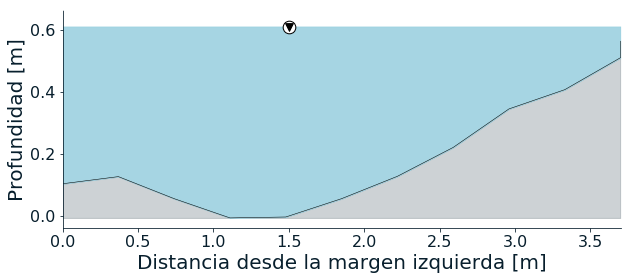

In [44]:
estacion.folder_path='./'
estacion.plot_seccion()

# Graficar precipitación antecendente
Estas graficas se generan con la precipitación ocurrida en la ventana de tiempo desde las 6 AM del día anterior al aforo y las 6 PM de este día. Para el guardado de la imagen se guarda por defecto en en la carpeta del aforo según la fecha y el identificador unico del aforo, para este ejemplo se ha creado la carpeta 20180509/QLaDoctoraQ3 para guardar las imagenes de la lluvia.
Para generar estas graficas, se calculan los campos de preicpitaicón acumulada de radar, a partir de la lectura de los binarios en que se almacenan los campos de precipitaicón de radar, por medio de WMF.

201805080600-201805091800-1023-siata_Consulta
201805080600-201805091800-1023-siata_Consulta
/media/nicolas/maso/Mario/user_output/radar/201805080600-201805091800-1023-siata_Consulta


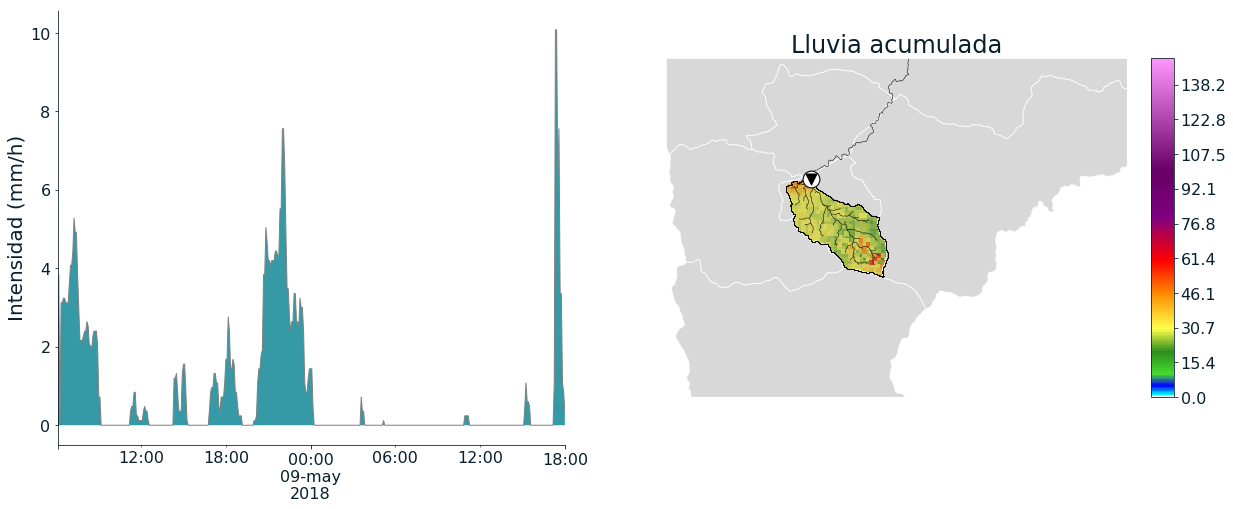

In [48]:
estacion.workspace='./'
estacion.plot_lluvia()

## Graficar análisis estadistico de aforos historicos

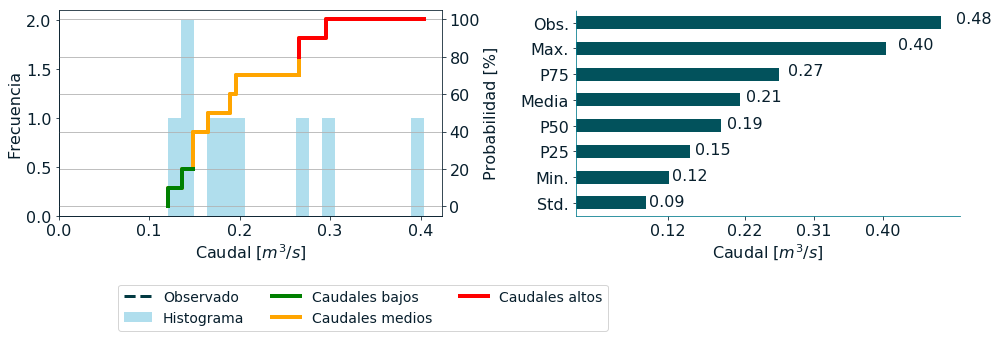

In [49]:
estacion.plot_compara_historicos()